In [8]:
import rpy2.robjects as robjects
import numpy as np
import os as os
from rpy2.robjects import numpy2ri
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.special import expit
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt


%load_ext autoreload
%autoreload 2
# Specify the path to your data files
data_path = "/Users/sarahurbut/tensornoulli_ehr_new/data"

# Activate automatic conversion between R and NumPy arrays
numpy2ri.activate()# Load data saved as .rds files
Y = np.array(robjects.r['readRDS'](os.path.join(data_path, 'Y.rds')))
E = np.array(robjects.r['readRDS'](os.path.join(data_path, 'event_for_aladynoulli.rds')))
G = np.array(robjects.r['readRDS'](os.path.join(data_path, 'prs.rds')))

E = E.astype(int)

# G should be float64
G = G.astype(float)
G.shape
G = G.T
print("G shape after transposition:", G.shape)

# Convert to PyTorch tensors
Y_tensor = torch.FloatTensor(Y)
E_tensor = torch.FloatTensor(E)
G_tensor = torch.FloatTensor(G)

# Get dimensions
N, D, T = Y_tensor.shape
P = G_tensor.shape[1]
T = int(E_tensor.max() + 1)  # 0-indexed time
K = 10  # number of topics

# Print shapes to verify
print("Tensor shapes:")
print(f"Y: {Y_tensor.shape}")  # [N, D]
print(f"E: {E_tensor.shape}")  # [N, D]
print(f"G: {G_tensor.shape}")  # [N, P]
print(f"Time range: 0 to {T-1}")
print(T)
print(K)


import rpy2.robjects as robjects
import pandas as pd
from rpy2.robjects import pandas2ri
pandas2ri.activate()

# Load the metadata from R
disease_names = pd.DataFrame(robjects.r['readRDS']('/Users/sarahurbut/Dropbox (Personal)/disease_names.rds'))
prs_names = pd.DataFrame(robjects.r['readRDS']('/Users/sarahurbut/Dropbox (Personal)/prs_names.rds'))
disease_names_list = disease_names[0].tolist()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
G shape after transposition: (9661, 36)
Tensor shapes:
Y: torch.Size([9661, 348, 51])
E: torch.Size([9661, 348])
G: torch.Size([9661, 36])
Time range: 0 to 50
51
10


In [9]:
from cluster_g_logit_init import *
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from scipy.spatial.distance import pdist, squareform
from scipy.special import expit
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering  # Add this import

In [10]:
prevalence_t=compute_smoothed_prevalence(Y=Y,window_size=5)
K=20
# Create model
model = AladynSurvivalFixedKernelsAvgLoss_clust_logitInit(N, D, T, K, P, G, Y, prevalence_t)
# Visualize the clusters
model.visualize_clusters(disease_names_list)

Lambda kernel condition number: 45200668.00
Phi kernel condition number: 89734320.00

Cluster Sizes:
Cluster 0: 10 diseases
Cluster 1: 15 diseases
Cluster 2: 8 diseases
Cluster 3: 8 diseases
Cluster 4: 18 diseases
Cluster 5: 31 diseases
Cluster 6: 84 diseases
Cluster 7: 6 diseases
Cluster 8: 26 diseases
Cluster 9: 9 diseases
Cluster 10: 11 diseases
Cluster 11: 19 diseases
Cluster 12: 15 diseases
Cluster 13: 18 diseases
Cluster 14: 6 diseases
Cluster 15: 15 diseases
Cluster 16: 25 diseases
Cluster 17: 4 diseases
Cluster 18: 8 diseases
Cluster 19: 12 diseases
Initialization complete!

Cluster Assignments:

Cluster 0:
  - Cataract (prevalence: 0.0025)
  - Macular degeneration (senile) of retina NOS (prevalence: 0.0006)
  - Myopia (prevalence: 0.0003)
  - Senile cataract (prevalence: 0.0021)
  - Disorders of vitreous body (prevalence: 0.0003)
  - Primary open angle glaucoma (prevalence: 0.0002)
  - Other retinal disorders (prevalence: 0.0002)
  - Glaucoma (prevalence: 0.0008)
  - Retinal d

Lambda kernel condition number: 45200668.00
Phi kernel condition number: 89734320.00

Cluster Sizes:
Cluster 0: 10 diseases
Cluster 1: 15 diseases
Cluster 2: 8 diseases
Cluster 3: 8 diseases
Cluster 4: 18 diseases
Cluster 5: 31 diseases
Cluster 6: 84 diseases
Cluster 7: 6 diseases
Cluster 8: 26 diseases
Cluster 9: 9 diseases
Cluster 10: 11 diseases
Cluster 11: 19 diseases
Cluster 12: 15 diseases
Cluster 13: 18 diseases
Cluster 14: 6 diseases
Cluster 15: 15 diseases
Cluster 16: 25 diseases
Cluster 17: 4 diseases
Cluster 18: 8 diseases
Cluster 19: 12 diseases
Initialization complete!

Cluster Memberships:

Cluster 0 (Size: 10)
Diseases:
  47: Cataract
  48: Macular degeneration (senile) of retina NOS
  49: Myopia
  85: Senile cataract
  112: Disorders of vitreous body
  182: Primary open angle glaucoma
  235: Other retinal disorders
  249: Glaucoma
  258: Retinal detachment with retinal defect
  274: Retinal detachments and defects
Average prevalence in cluster: 0.001

Cluster 1 (Size: 1

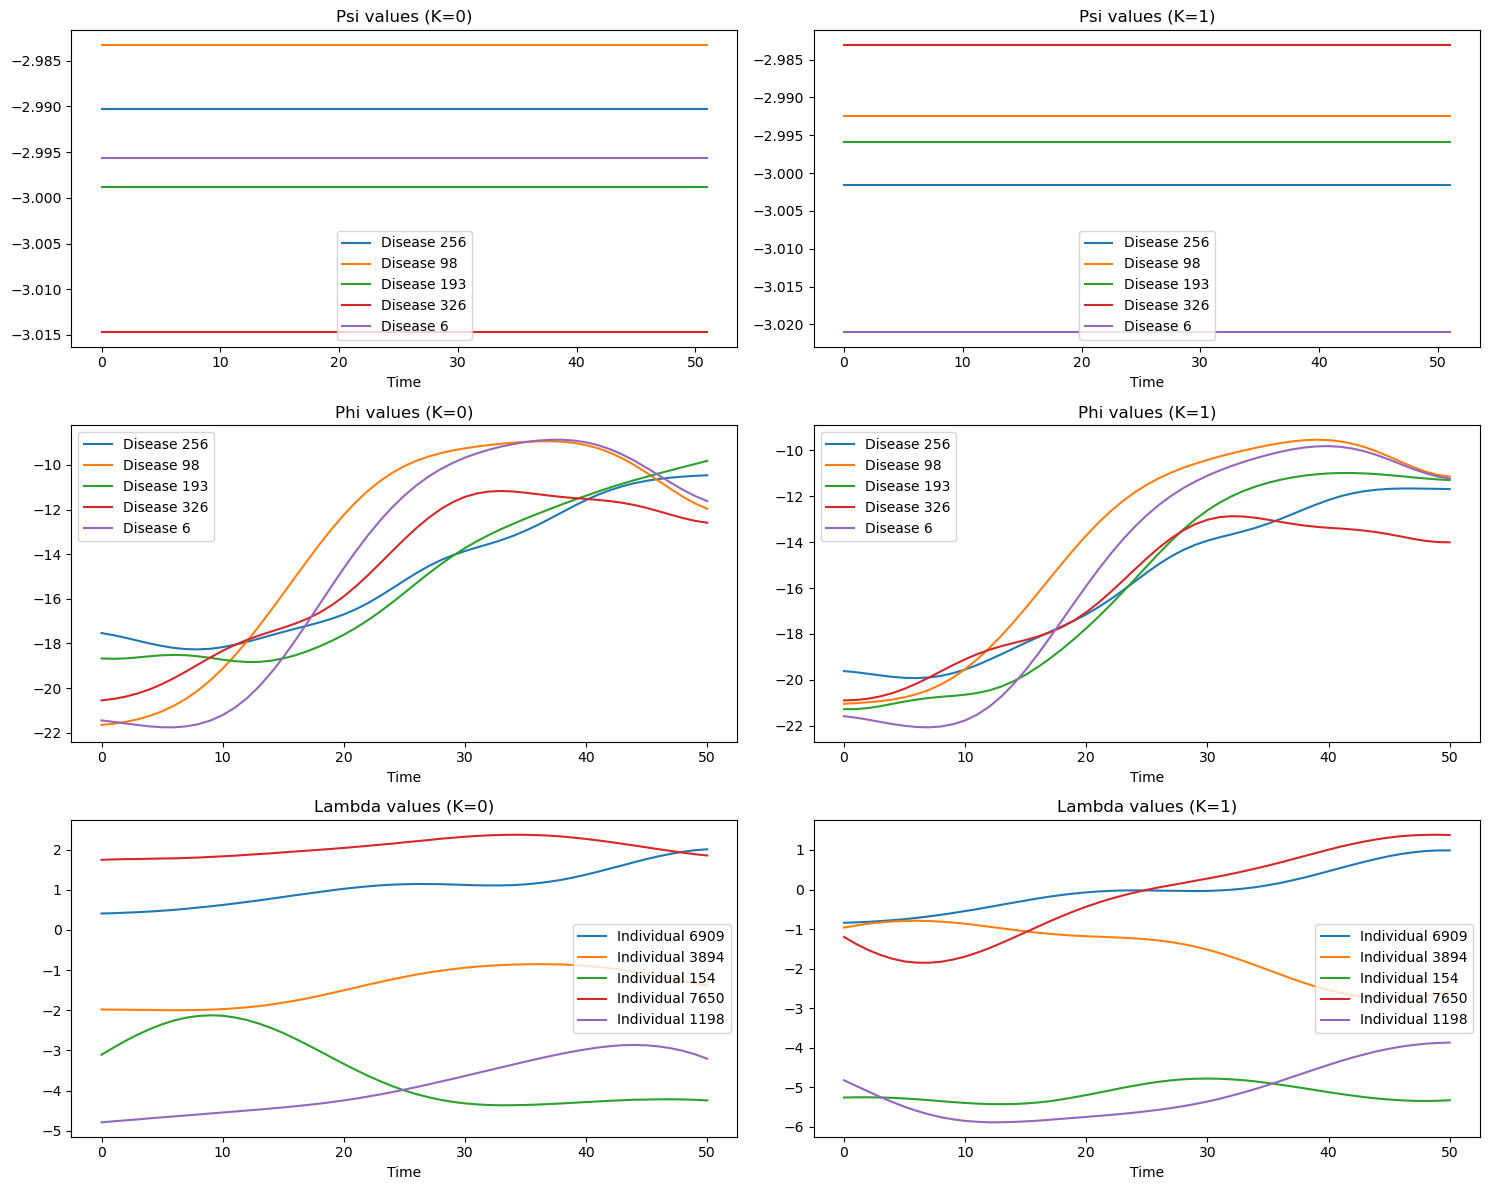


Cluster membership for sampled diseases:
Disease 256: Cluster 11
Disease 98: Cluster 15
Disease 193: Cluster 10
Disease 326: Cluster 6
Disease 6: Cluster 16


In [11]:
model = AladynSurvivalFixedKernelsAvgLoss_clust_logitInit(N, D, T, K, P, G, Y, prevalence_t,disease_names_list)
model.print_cluster_memberships()
model.plot_initial_params()

/Users/sarahurbut/aladynoulli/pyScripts/cluster_g_logit_init.py:799: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  plt.tight_layout()


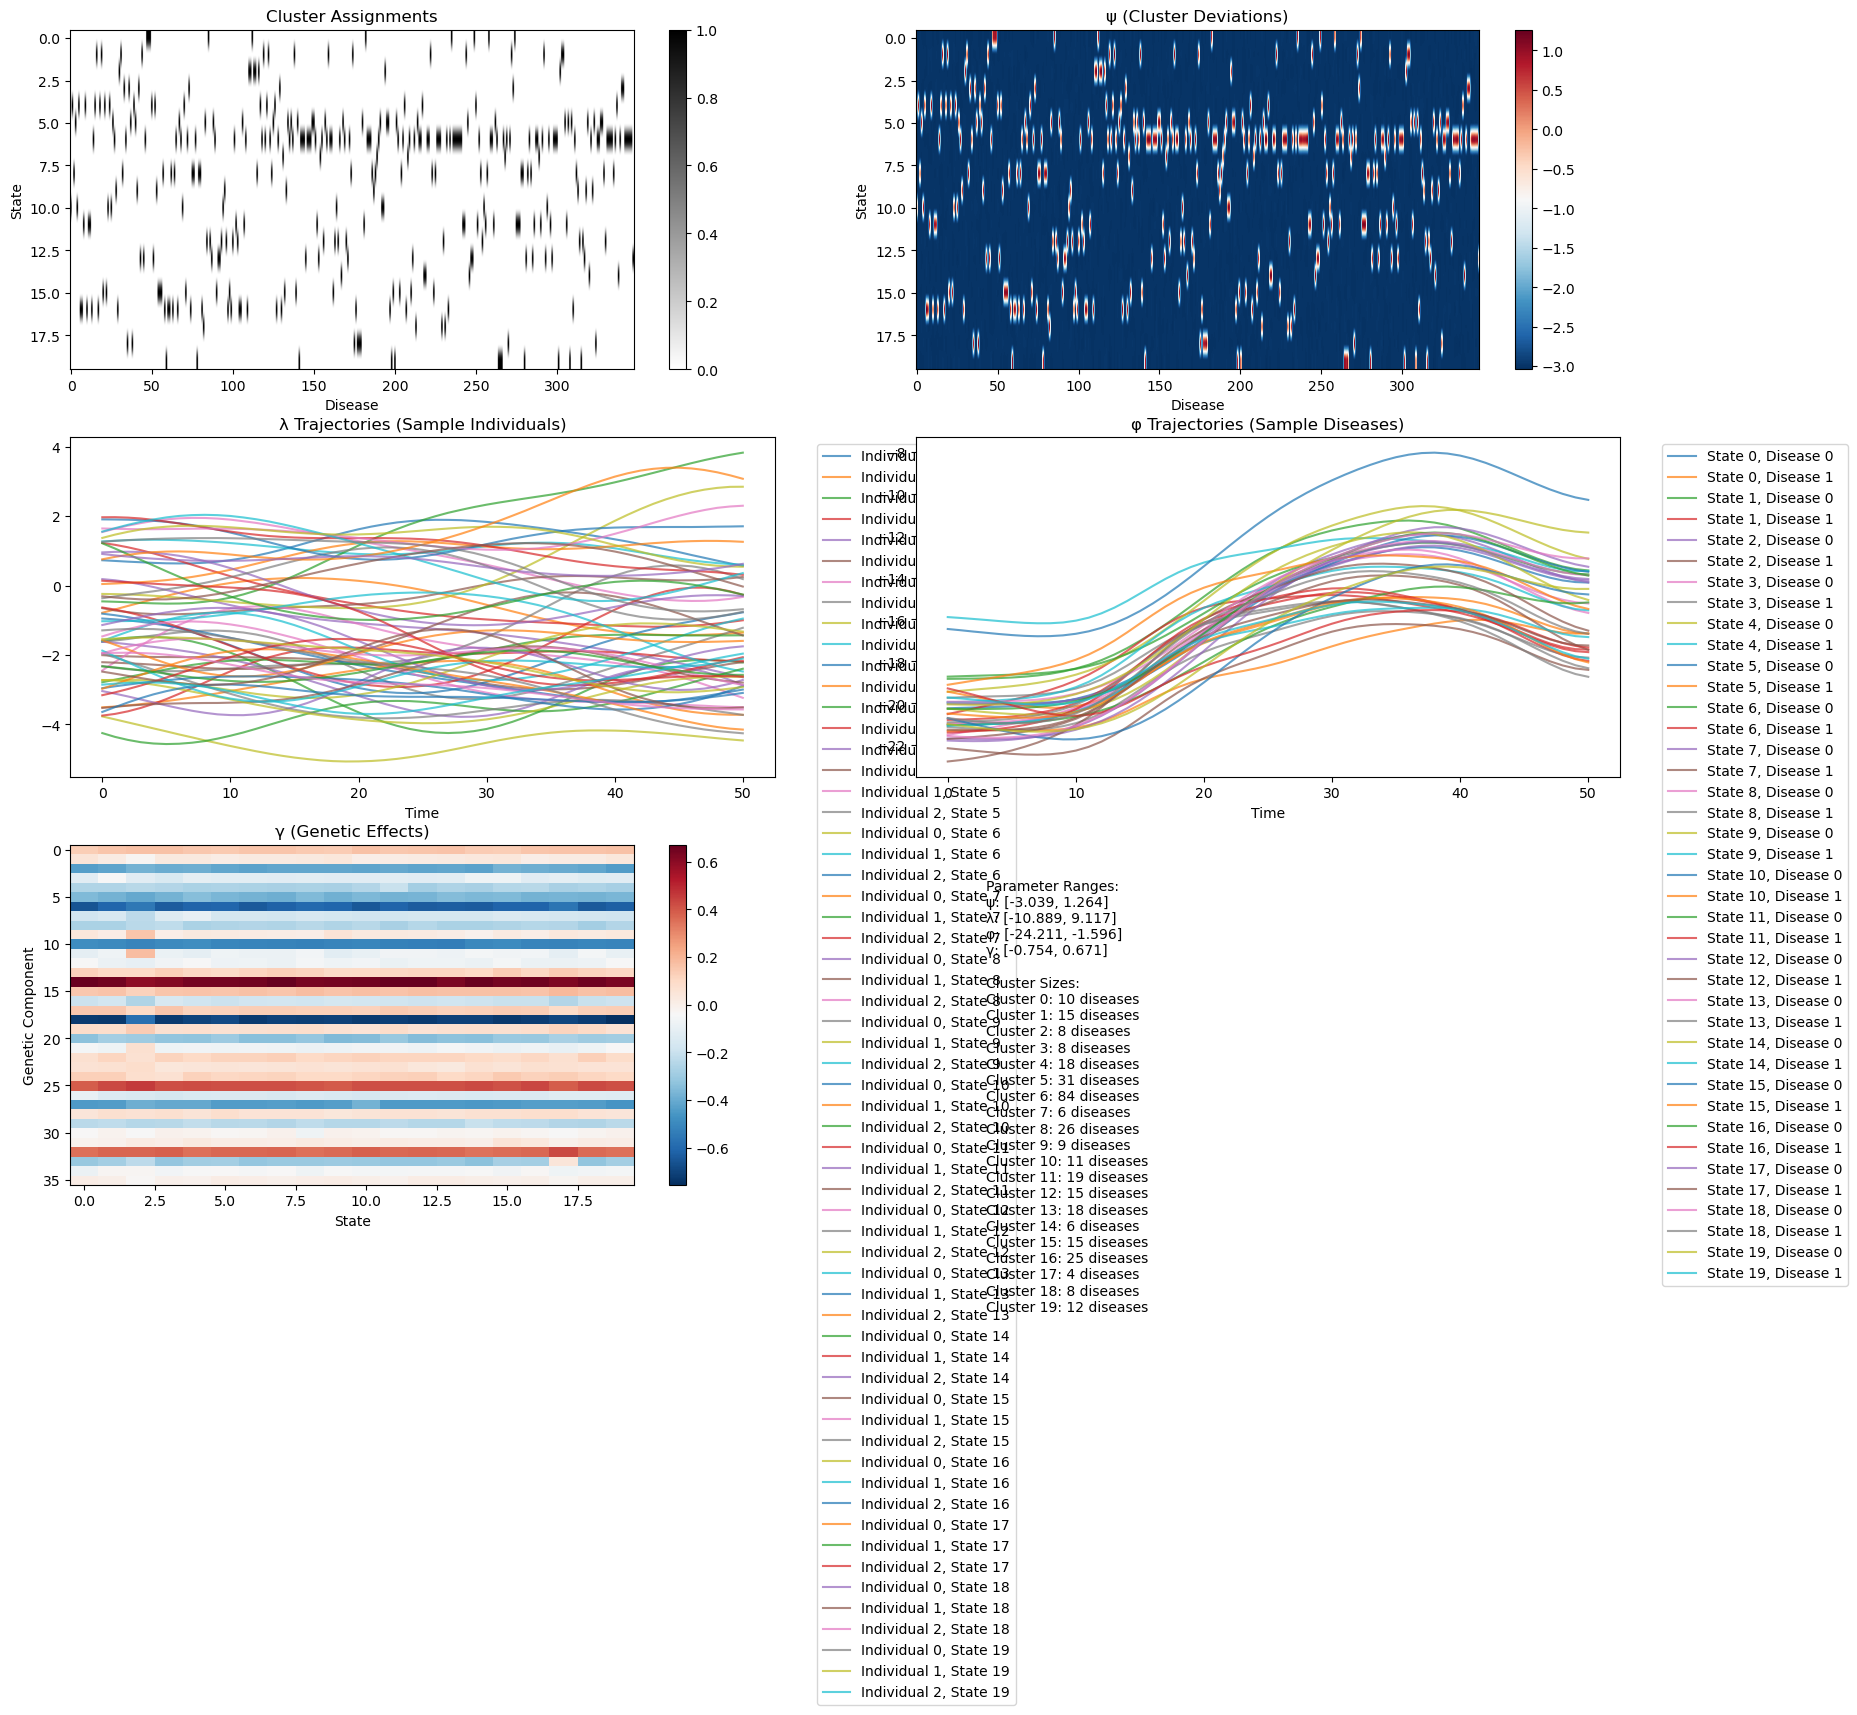

Parameter containing:
tensor([[-3.0054, -3.0250, -2.9982,  ..., -2.9706, -2.9985, -3.0001],
        [-3.0139, -3.0103, -2.9923,  ..., -3.0064, -2.9859, -2.9999],
        [-2.9893, -2.9845, -3.0047,  ..., -2.9989, -2.9906, -2.9971],
        ...,
        [-2.9968, -3.0035, -3.0019,  ..., -3.0006, -3.0056, -2.9982],
        [-2.9830, -2.9855, -3.0012,  ..., -3.0119, -2.9924, -3.0045],
        [-3.0096, -3.0028, -3.0112,  ..., -2.9941, -3.0071, -2.9988]],
       requires_grad=True)

In [12]:
model.visualize_initialization()
model.psi

In [13]:
Y_tensor.shape

torch.Size([9661, 348, 51])

In [7]:
# Initialize model
torch.manual_seed(42)
np.random.seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

model = AladynSurvivalFixedKernelsAvgLoss_clust_logitInit(N, D, T, K, P, G, Y, prevalence_t, disease_names_list)

# Store initial psi values
initial_psi = model.psi.detach().clone()
initial_phi=model.phi.detach().clone()
initial_lambda=model.lambda_.detach().clone()

history = model.fit(E_tensor, num_epochs=1000, learning_rate=1e-4, lambda_reg=1e-2)

# Compare final vs initial psi
print("\nOverall psi changes:")

Lambda kernel condition number: 45200668.00
Phi kernel condition number: 89734320.00

Cluster Sizes:
Cluster 0: 27 diseases
Cluster 1: 32 diseases
Cluster 2: 12 diseases
Cluster 3: 9 diseases
Cluster 4: 19 diseases
Cluster 5: 74 diseases
Cluster 6: 31 diseases
Cluster 7: 12 diseases
Cluster 8: 10 diseases
Cluster 9: 8 diseases
Cluster 10: 5 diseases
Cluster 11: 10 diseases
Cluster 12: 6 diseases
Cluster 13: 12 diseases
Cluster 14: 14 diseases
Cluster 15: 9 diseases
Cluster 16: 23 diseases
Cluster 17: 5 diseases
Cluster 18: 18 diseases
Cluster 19: 12 diseases
Initialization complete!
Starting training...


/Users/sarahurbut/aladynoulli/pyScripts/cluster_g_logit_init.py:290: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  event_times_tensor = torch.tensor(event_times, dtype=torch.long)



Epoch 0
Loss: 1113.0669
Psi gradient stats:
Mean: -3.4540e-05
Std:  4.6873e-03
Max:  1.7338e-02
Min:  -1.8840e-02
Average psi change: 9.9903e-05
Epoch 0, Loss: 1113.0669, Gradients - Lambda: 5.615e-01, Phi: 1.303e+01, Gamma: 5.300e-02, Psi: 1.884e-02

Epoch 1
Loss: 848.2545
Psi gradient stats:
Mean: -3.4483e-05
Std:  4.6754e-03
Max:  1.7263e-02
Min:  -1.8705e-02
Average psi change: 9.9334e-05
Epoch 1, Loss: 848.2545, Gradients - Lambda: 4.977e-01, Phi: 1.208e+01, Gamma: 5.210e-02, Psi: 1.870e-02

Estimated total training time: 914.7 minutes

Epoch 2
Loss: 659.2227
Psi gradient stats:
Mean: -3.4779e-05
Std:  4.6625e-03
Max:  1.7160e-02
Min:  -1.8597e-02
Average psi change: 9.8977e-05
Epoch 2, Loss: 659.2227, Gradients - Lambda: 4.587e-01, Phi: 1.130e+01, Gamma: 5.107e-02, Psi: 1.860e-02

Epoch 3
Loss: 530.0841
Psi gradient stats:
Mean: -3.4596e-05
Std:  4.6493e-03
Max:  1.7015e-02
Min:  -1.8506e-02
Average psi change: 9.8635e-05
Epoch 3, Loss: 530.0841, Gradients - Lambda: 4.218e-01, P

In [ ]:
import matplotlib.pyplot as plt

# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot loss
ax1.plot(history['loss'])
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training Loss')
ax1.grid(True)

# Plot gradients
ax2.plot(history['max_grad_lambda'], label='Lambda')
ax2.plot(history['max_grad_phi'], label='Phi')
ax2.plot(history['max_grad_gamma'], label='Gamma')
ax2.plot(history['max_grad_psi'], label='Psi')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Max Gradient Magnitude')
ax2.set_title('Parameter Gradients')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Get the posterior phi values
phi_posterior = model.phi.detach().cpu().numpy()  # Shape should be [K, D, T]

# Create visualization
plt.figure(figsize=(15, 10))

# Plot phi trajectories for each cluster
for k in range(model.K):
    # Get diseases in this cluster
    cluster_mask = (model.clusters == k)
    cluster_phis = phi_posterior[k, cluster_mask, :]
    
    plt.subplot(4, 5, k+1)  # Adjust grid size based on number of clusters
    plt.plot(cluster_phis.T, alpha=0.3)  # Plot each disease trajectory
    plt.title(f'Cluster {k}\n({np.sum(cluster_mask)} diseases)')
    plt.grid(True)
    
plt.tight_layout()
plt.show()

# You might also want to see cluster means
plt.figure(figsize=(12, 6))
cluster_means = np.array([phi_posterior[k, model.clusters == k, :].mean(axis=0) 
                         for k in range(model.K)])
plt.plot(cluster_means.T)
plt.title('Mean Phi Trajectories by Cluster')
plt.xlabel('Time')
plt.ylabel('Phi Value')
plt.legend([f'Cluster {k}' for k in range(model.K)])
plt.grid(True)
plt.show()

In [12]:
import torch

# Save complete state for R
save_path = '/Users/sarahurbut/aladynoulli/pyScripts/model_complete_for_R_121_logitinit_nobg.pt'

torch.save({
    'model_state_dict': model.state_dict(),
    'clusters': model.clusters,
    'psi': model.psi,
    'Y': Y,
    'prevalence_t':prevalence_t,
    'G': G,
    'E': E,
    'disease_names': disease_names,
    'hyperparameters': {
        'N': N,
        'D': D,
        'T': T,
        'P': P,
        'K': K
    }
}, save_path)

In [14]:
import numpy as np
import pandas as pd
import rpy2.robjects as robjects
from rpy2.robjects import numpy2ri
numpy2ri.activate()

# Extract key components from model
with torch.no_grad():
    pi_pred, theta, phi = model.forward()
    
# Convert tensors to numpy arrays - check type first
pi_pred = pi_pred.cpu().detach().numpy()
theta = theta.cpu().detach().numpy()
phi = model.phi.cpu().detach().numpy()
psi = model.psi.cpu().detach().numpy()
lambda_vals = model.lambda_.cpu().detach().numpy()

# These are already numpy arrays
clusters = model.clusters  # Already numpy


# Save components as .rds files
save_path = '/Users/sarahurbut/Dropbox (Personal)/aladynoulli/Rdata/'
# Main parameters
robjects.r.saveRDS(phi, f"{save_path}phi.rds")
robjects.r.saveRDS(psi, f"{save_path}psi.rds")
robjects.r.saveRDS(lambda_vals, f"{save_path}lambda.rds")
robjects.r.saveRDS(theta, f"{save_path}theta.rds")
robjects.r.saveRDS(pi_pred, f"{save_path}pi_pred.rds")
robjects.r.saveRDS(clusters, f"{save_path}clusters.rds")


KeyboardInterrupt: 

In [ ]:

robjects.r.saveRDS(Y, f"{save_path}Y.rds")
robjects.r.saveRDS(E, f"{save_path}E.rds")
robjects.r.saveRDS(G, f"{save_path}G.rds")


In [ ]:

prevalence_t = checkpoint['prevalence_t']  # Get from checkpoint instead


robjects.r.saveRDS(prevalence_t, f"{save_path}prevalence_t.rds")


In [ ]:
# Save disease names
robjects.r.saveRDS(checkpoint['disease_names'], f"{save_path}disease_names.rds")

In [18]:
# First load the saved state
import pickle
checkpoint = torch.load('/Users/sarahurbut/Dropbox (Personal)/for10kanalysis/13model_complete_for_R_127_withbetteroptim.pt')


/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_39325/4060834933.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load('/Users/sarahurbut/Dr

In [7]:
import torch
import pickle

def load_legacy_model(path):
    try:
        # Try with specific settings for older pandas versions
        return torch.load(
            path,
            map_location='cpu',
            pickle_module=pickle,
            encoding='latin1',
            pickle_load_args={'encoding': 'latin1'}
        )
    except Exception as e:
        print(f"Error: {e}")
        return None

# First, let's check pandas version
import pandas as pd
print(f"Current pandas version: {pd.__version__}")

# Try loading with version handling
checkpoint = load_legacy_model('/Users/sarahurbut/Dropbox (Personal)/model_complete_for_R_121_logitinit_nobg.pt')


Current pandas version: 1.3.5
Error: 'pickle_load_args' is an invalid keyword argument for Unpickler()


In [19]:

# Create a new model instance with the same parameters
model = AladynSurvivalFixedKernelsAvgLoss_clust_logitInit(
    N=checkpoint['hyperparameters']['N'],
    D=checkpoint['hyperparameters']['D'],
    T=checkpoint['hyperparameters']['T'],
    K=checkpoint['hyperparameters']['K'],
    P=checkpoint['hyperparameters']['P'],
    G=checkpoint['G'],
    Y=checkpoint['Y'],
    prevalence_t=checkpoint['prevalence_t'],
    disease_names=checkpoint['disease_names']
)

# Load the saved state into the model
model.load_state_dict(checkpoint['model_state_dict'])
model.clusters = checkpoint['clusters']


# Generate predictions
with torch.no_grad():
    pi_pred, theta, phi = model.forward()
    pi_pred = pi_pred.cpu().numpy()

/Users/sarahurbut/aladynoulli/pyScripts/cluster_g_logit_init.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.G = torch.tensor(G, dtype=torch.float32)
/Users/sarahurbut/aladynoulli/pyScripts/cluster_g_logit_init.py:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.Y = torch.tensor(Y, dtype=torch.float32)


Lambda kernel condition number: 56314924.00
Phi kernel condition number: 59684776.00

Cluster Sizes:
Cluster 0: 18 diseases
Cluster 1: 9 diseases
Cluster 2: 14 diseases
Cluster 3: 21 diseases
Cluster 4: 5 diseases
Cluster 5: 16 diseases
Cluster 6: 74 diseases
Cluster 7: 13 diseases
Cluster 8: 9 diseases
Cluster 9: 26 diseases
Cluster 10: 5 diseases
Cluster 11: 11 diseases
Cluster 12: 7 diseases
Cluster 13: 22 diseases
Cluster 14: 16 diseases
Cluster 15: 16 diseases
Cluster 16: 8 diseases
Cluster 17: 10 diseases
Cluster 18: 30 diseases
Cluster 19: 18 diseases
Initialization complete!


/Users/sarahurbut/aladynoulli/pyScripts/cluster_g_logit_init.py:799: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  plt.tight_layout()


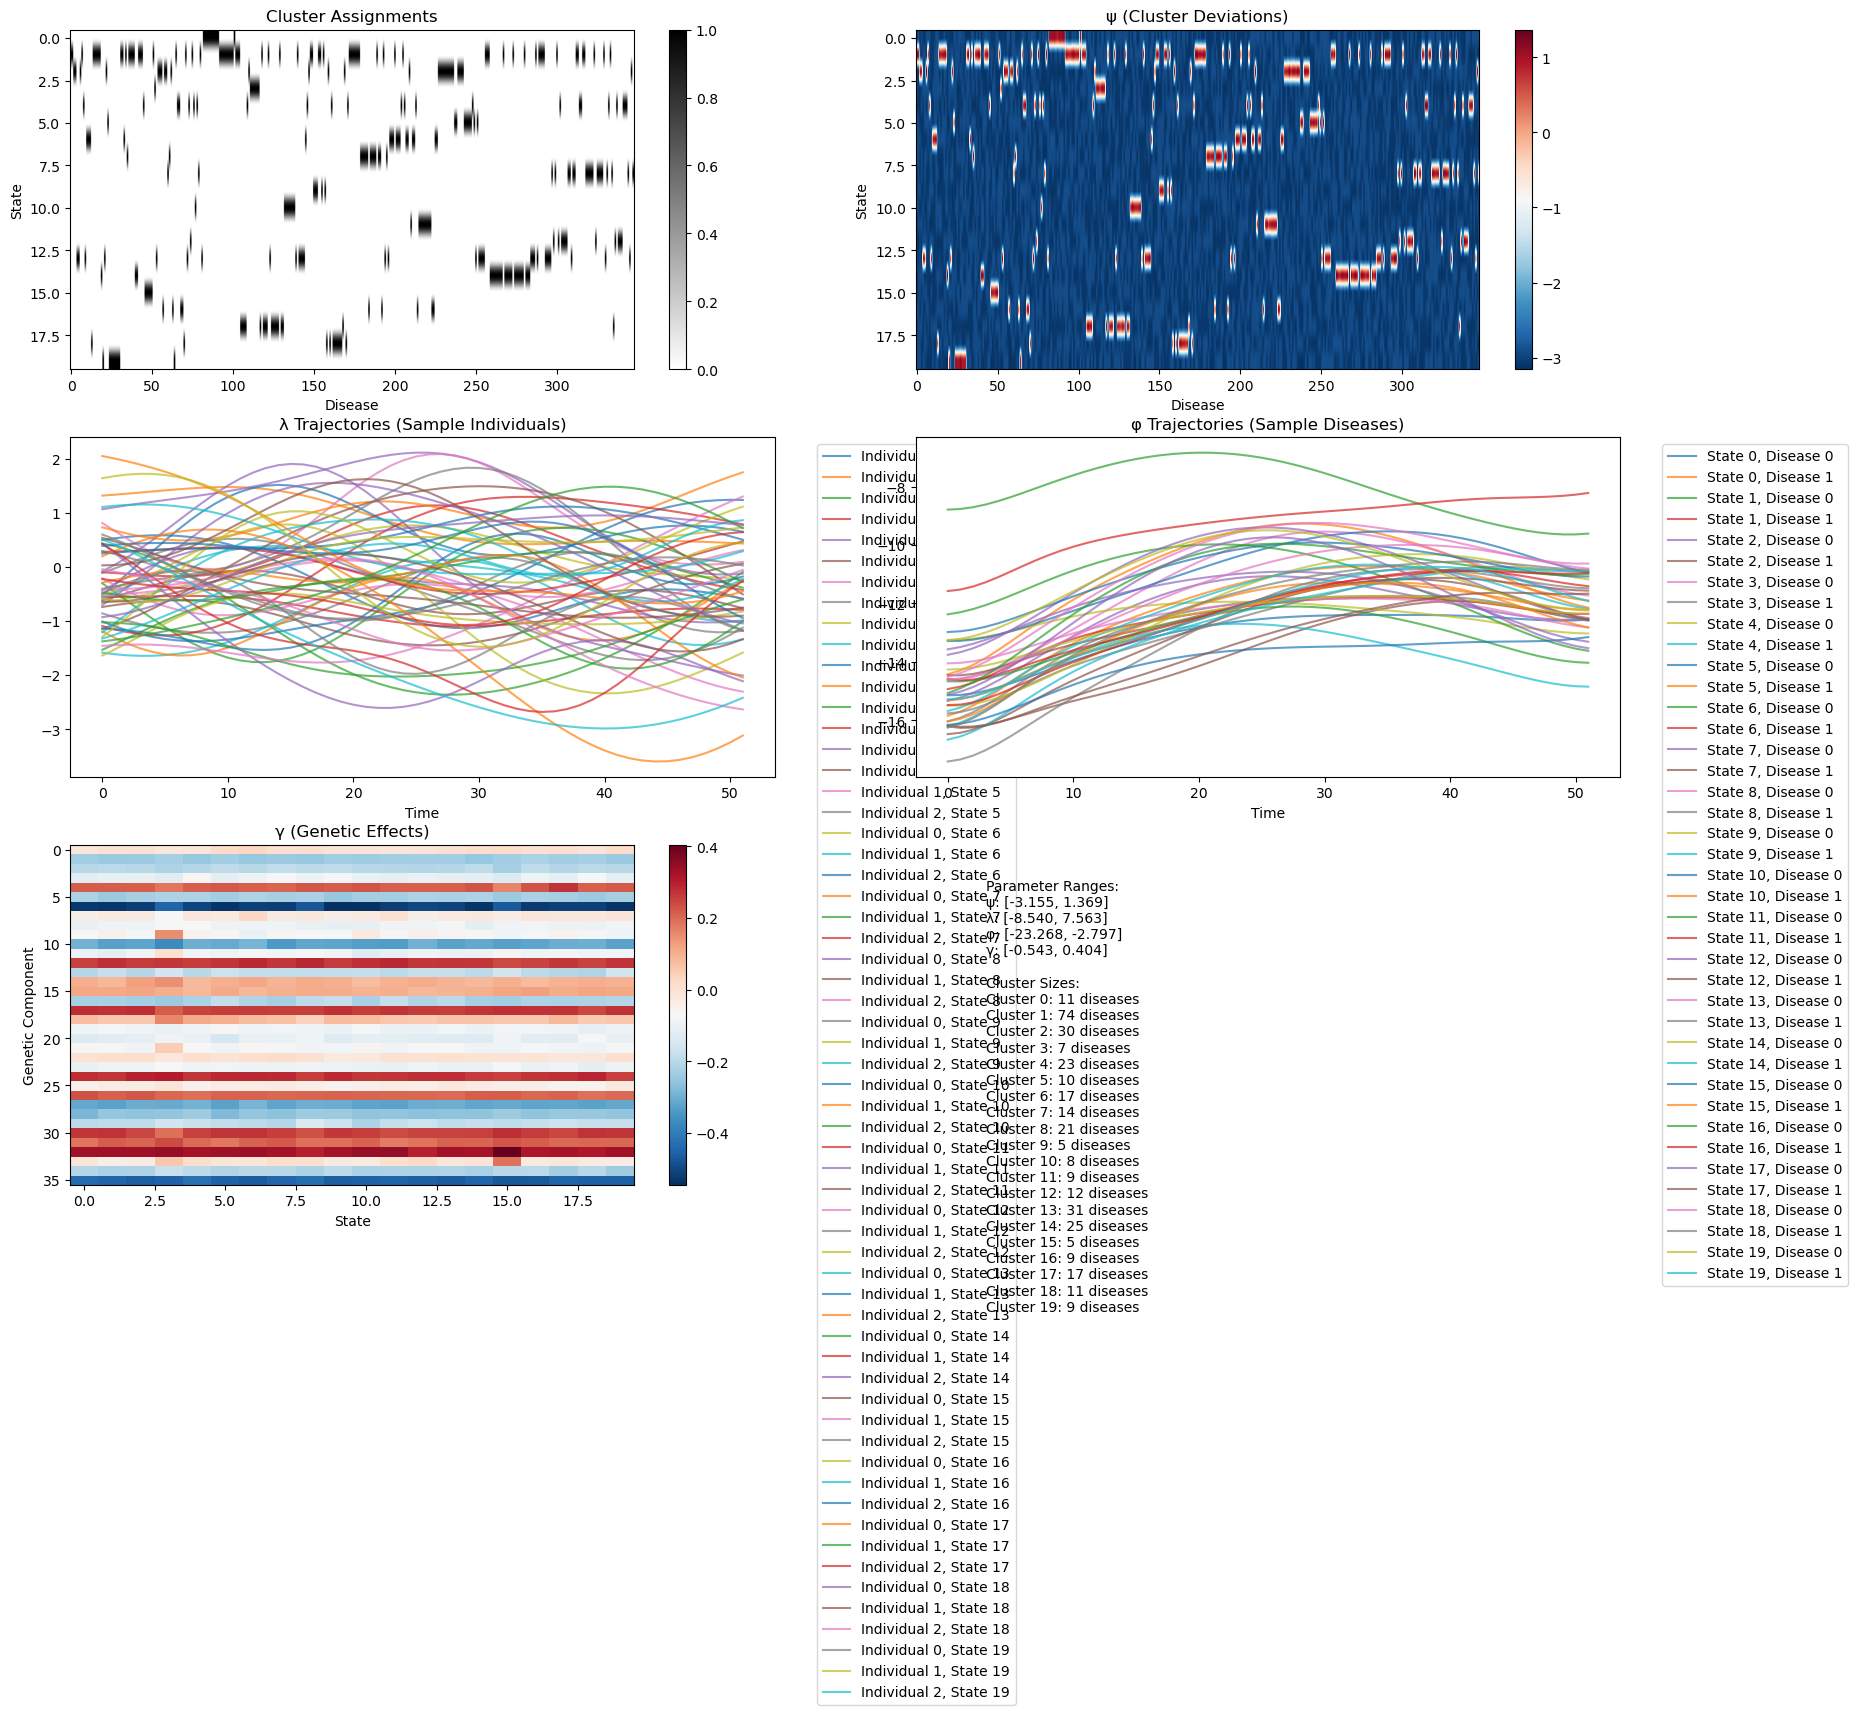

In [20]:
model.visualize_initialization()

In [ ]:
# Plot training loss history
plt.figure(figsize=(10, 5))
plt.plot(history['loss'])
plt.yscale('log')
plt.title('Training Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss (log scale)')
plt.grid(True)
plt.show()

# Visualize psi map
plt.figure(figsize=(15, 8))
psi_np = model.psi.detach().numpy()
plt.imshow(psi_np, aspect='auto', cmap='RdBu_r')
plt.colorbar(label='ψ value')
plt.xlabel('Disease')
plt.ylabel('State/Cluster')
plt.title('Disease-State Deviations (ψ) After Mean Removal')

# If you have disease names, add them as x-axis labels
if disease_names_list:
    plt.xticks(range(len(disease_names_list)), disease_names_list, rotation=90)

plt.tight_layout()
plt.show()

# Print some summary statistics about psi
print("\nPsi Statistics:")
print(f"Mean: {psi_np.mean():.3f}")
print(f"Std: {psi_np.std():.3f}")
print(f"Min: {psi_np.min():.3f}")
print(f"Max: {psi_np.max():.3f}")

# Optionally, identify the strongest associations

In [ ]:
psi_np = model.psi.detach().numpy()

# Print basic info about psi matrix
print("Psi matrix shape:", psi_np.shape)
print("\nPsi value ranges:")
print(f"Min: {psi_np.min():.3f}")
print(f"Max: {psi_np.max():.3f}")
print(f"Mean: {psi_np.mean():.3f}")
print(f"Std: {psi_np.std():.3f}")

# Look at a small sample of values
print("\nSample of psi values (first 5 states, first 5 diseases):")
print(psi_np[:5, :5])

In [ ]:
def plot_signature_top_diseases_centered(model, disease_names, n_top=10):
    """
    Show top diseases for each signature, centered relative to prevalence
    """
    # Get phi and prevalence
    phi = model.phi.detach().numpy()  # Shape: (K, D, T)
    prevalence_logit = model.logit_prev_t.detach().numpy()  # Shape: (D, T)
    
    # Center phi relative to prevalence
    phi_centered = np.zeros_like(phi)
    for k in range(phi.shape[0]):
        for d in range(phi.shape[1]):
            phi_centered[k, d, :] = phi[k, d, :] - prevalence_logit[d, :]
    
    # Average over time
    phi_avg = phi_centered.mean(axis=2)  # Shape: (K, D)
    
    # For each signature, get top diseases
    for k in range(phi_avg.shape[0]):
        scores = phi_avg[k, :]
        top_indices = np.argsort(scores)[-n_top:][::-1]
        
        print(f"\nTop {n_top} diseases in Signature {k} (relative to baseline):")
        for idx in top_indices:
            avg_effect = scores[idx]
            temporal_std = np.std(phi_centered[k, idx, :])
            # Convert to odds ratio for interpretability
            odds_ratio = np.exp(avg_effect)
            print(f"{disease_names[idx]}: effect={avg_effect:.3f} (OR={odds_ratio:.2f}), std={temporal_std:.3f}")

# Run visualization
plot_signature_top_diseases_centered(model, disease_names_list)

In [ ]:
def compare_disease_rankings(model, disease_names, n_top=10):
    """
    Compare initial vs final disease rankings for each signature
    """
    # Get initial rankings from psi
    psi = model.psi.detach().numpy()  # Shape: (K, D)
    
    # Get final rankings from centered phi
    phi = model.phi.detach().numpy()  # Shape: (K, D, T)
    prevalence_logit = model.logit_prev_t.detach().numpy()  # Shape: (D, T)
    
    # Center phi relative to prevalence
    phi_centered = np.zeros_like(phi)
    for k in range(phi.shape[0]):
        for d in range(phi.shape[1]):
            phi_centered[k, d, :] = phi[k, d, :] - prevalence_logit[d, :]
    
    # Average over time
    phi_avg = phi_centered.mean(axis=2)  # Shape: (K, D)
    
    # Compare rankings for each signature
    for k in range(phi_avg.shape[0]):
        print(f"\nSignature {k}:")
        
        # Get initial top diseases from psi
        initial_scores = psi[k, :]
        initial_top = np.argsort(initial_scores)[-n_top:][::-1]
        
        # Get final top diseases from phi
        final_scores = phi_avg[k, :]
        final_top = np.argsort(final_scores)[-n_top:][::-1]
        
        print("\nInitial top diseases:")
        for i, idx in enumerate(initial_top):
            print(f"{i+1}. {disease_names[idx]}: {initial_scores[idx]:.3f}")
            
        print("\nFinal top diseases:")
        for i, idx in enumerate(final_top):
            print(f"{i+1}. {disease_names[idx]}: {final_scores[idx]:.3f}")
            
        # Calculate rank changes
        initial_ranks = {disease: rank for rank, disease in enumerate(initial_top)}
        final_ranks = {disease: rank for rank, disease in enumerate(final_top)}
        
        # Find diseases that changed ranks significantly
        changed_diseases = set(initial_top) | set(final_top)
        for disease in changed_diseases:
            initial_rank = initial_ranks.get(disease, n_top+1)
            final_rank = final_ranks.get(disease, n_top+1)
            if abs(final_rank - initial_rank) > 2:  # Threshold for significant change
                print(f"\n{disease_names[disease]} changed from rank {initial_rank+1} to {final_rank+1}")

# Run comparison
compare_disease_rankings(model, disease_names_list)

In [ ]:
def compare_disease_rankings(model, disease_names, n_top=10):
    """
    Compare initial vs final disease rankings for each signature
    """
    # Get initial rankings from psi
    psi = model.psi.detach().numpy()  # Shape: (K, D)
    
    # Get final rankings from centered phi
    phi = model.phi.detach().numpy()  # Shape: (K, D, T)
    prevalence_logit = model.logit_prev_t.detach().numpy()  # Shape: (D, T)
    
    # Center phi relative to prevalence
    phi_centered = np.zeros_like(phi)
    for k in range(phi.shape[0]):
        for d in range(phi.shape[1]):
            phi_centered[k, d, :] = phi[k, d, :] - prevalence_logit[d, :]
    
    # Average over time
    phi_avg = phi_centered.mean(axis=2)  # Shape: (K, D)
    
    # Compare rankings for each signature
    for k in range(phi_avg.shape[0]):
        print(f"\nSignature {k}:")
        
        # Get initial top diseases from psi
        initial_scores = psi[k, :]
        initial_top = np.argsort(initial_scores)[-n_top:][::-1]
        
        # Get final top diseases from phi
        final_scores = phi_avg[k, :]
        final_top = np.argsort(final_scores)[-n_top:][::-1]
        
        print("\nInitial top diseases:")
        for i, idx in enumerate(initial_top):
            print(f"{i+1}. {disease_names[idx]}: {initial_scores[idx]:.3f}")
            
        print("\nFinal top diseases:")
        for i, idx in enumerate(final_top):
            print(f"{i+1}. {disease_names[idx]}: {final_scores[idx]:.3f}")
            
        # Calculate rank changes
        initial_ranks = {disease: rank for rank, disease in enumerate(initial_top)}
        final_ranks = {disease: rank for rank, disease in enumerate(final_top)}
        
        # Find diseases that changed ranks significantly
        changed_diseases = set(initial_top) | set(final_top)
        for disease in changed_diseases:
            initial_rank = initial_ranks.get(disease, n_top+1)
            final_rank = final_ranks.get(disease, n_top+1)
            if abs(final_rank - initial_rank) > 2:  # Threshold for significant change
                print(f"\n{disease_names[disease]} changed from rank {initial_rank+1} to {final_rank+1}")

# Run comparison
compare_disease_rankings(model, disease_names_list)

In [30]:
def evaluate_predictions(model, Y, event_times):
    with torch.no_grad():
        pi_pred, _, _ = model.forward()
        pi_pred = pi_pred.cpu().numpy()
    
    # Create at-risk mask
    N, D, T = Y.shape
    at_risk = np.zeros_like(Y, dtype=bool)
    for n in range(N):
        for d in range(D):
            at_risk[n,d,:event_times[n,d]] = True
    
    # Get predictions for events vs non-events
    event_probs = pi_pred[Y == 1 & at_risk]
    nonevent_probs = pi_pred[Y == 0 & at_risk]
    
    print(f"Average pi for events: {event_probs.mean():.4f} (std: {event_probs.std():.4f})")
    print(f"Average pi for non-events: {nonevent_probs.mean():.4f} (std: {nonevent_probs.std():.4f})")
    
    # Could also add:
    # 1. ROC curve
    # 2. Disease-specific metrics
    # 3. Time-stratified evaluation
    
    return event_probs, nonevent_probs

In [ ]:
def evaluate_predictions(model, Y, event_times):
    with torch.no_grad():
        pi_pred, _, _ = model.forward()
        pi_pred = pi_pred.cpu().numpy()
    
    # Create at-risk mask
    N, D, T = Y.shape
    at_risk = np.zeros_like(Y, dtype=bool)
    for n in range(N):
        for d in range(D):
            at_risk[n,d,:event_times[n,d]] = True
    
    # Get predictions for events vs non-events
    event_probs = pi_pred[Y == 1 & at_risk]
    nonevent_probs = pi_pred[Y == 0 & at_risk]
    
    print(f"Average pi for events: {event_probs.mean():.4f} (std: {event_probs.std():.4f})")
    print(f"Average pi for non-events: {nonevent_probs.mean():.4f} (std: {nonevent_probs.std():.4f})")
    
    # Could also add:
    # 1. ROC curve
    # 2. Disease-specific metrics
    # 3. Time-stratified evaluation
    
    return event_probs, nonevent_probs

evaluate_predictions(model, Y, E)

In [19]:
def visualize_predictions(model, Y, event_times):
    with torch.no_grad():
        pi_pred, _, _ = model.forward()
        pi_pred = pi_pred.cpu().numpy()
    
    N, D, T = Y.shape
    at_risk = np.zeros_like(Y, dtype=bool)
    for n in range(N):
        for d in range(D):
            at_risk[n,d,:event_times[n,d]] = True
    
    # Get predictions
    event_probs = pi_pred[Y == 1 & at_risk]
    nonevent_probs = pi_pred[Y == 0 & at_risk]
    
    plt.figure(figsize=(15, 5))
    
    # 1. Density plot of predictions
    plt.subplot(131)
    plt.hist(event_probs, bins=50, density=True, alpha=0.5, label='Events', color='red')
    plt.hist(nonevent_probs, bins=50, density=True, alpha=0.5, label='Non-events', color='blue')
    plt.xlabel('Predicted Probability')
    plt.ylabel('Density')
    plt.title('Distribution of Predictions')
    plt.legend()
    
    # 2. ROC curve
    from sklearn.metrics import roc_curve, auc
    y_true = np.concatenate([np.ones_like(event_probs), np.zeros_like(nonevent_probs)])
    y_pred = np.concatenate([event_probs, nonevent_probs])
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    
    plt.subplot(132)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    
    # 3. Calibration plot
    from sklearn.calibration import calibration_curve
    prob_true, prob_pred = calibration_curve(y_true, y_pred, n_bins=10)
    
    plt.subplot(133)
    plt.plot(prob_pred, prob_true, marker='o', label='Model')
    plt.plot([0, 1], [0, 1], linestyle='--', label='Perfect calibration')
    plt.xlabel('Mean predicted probability')
    plt.ylabel('Empirical probability')
    plt.title('Calibration Plot')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print(f"Average pi for events: {event_probs.mean():.4f} (std: {event_probs.std():.4f})")
    print(f"Average pi for non-events: {nonevent_probs.mean():.4f} (std: {nonevent_probs.std():.4f})")
    print(f"AUC: {roc_auc:.4f}")
    
    return event_probs, nonevent_probs, roc_auc

In [ ]:
visualize_predictions(model, Y, E)

In [ ]:
def plot_event_predictions(model, Y, event_times):
    with torch.no_grad():
        pi_pred, _, _ = model.forward()
        pi_pred = pi_pred.cpu().numpy()
    
    # Get predictions for events and non-events
    events_mask = (Y == 1)
    nonevents_mask = (Y == 0)
    
    # Sample for speed (optional)
    n_samples = 10000
    event_probs = np.random.choice(pi_pred[events_mask], n_samples)
    nonevent_probs = np.random.choice(pi_pred[nonevents_mask], n_samples)
    
    plt.figure(figsize=(8, 5))
    plt.hist(event_probs, bins=50, density=True, alpha=0.5, 
             label=f'Events (mean={event_probs.mean():.4f})', color='red')
    plt.hist(nonevent_probs, bins=50, density=True, alpha=0.5, 
             label=f'Non-events (mean={nonevent_probs.mean():.4f})', color='blue')
    plt.xlabel('Predicted Probability')
    plt.ylabel('Density')
    plt.title('Distribution of Predictions')
    plt.legend()
    plt.show()
    
    return event_probs, nonevent_probs
 
plot_event_predictions(model,Y,E)

In [ ]:
def plot_signature_temporal_patterns(model, disease_names, n_top=10, selected_signatures=None):
    """
    Show temporal patterns of top diseases for each signature
    """
    #phi = model.phi.detach().numpy()  # Shape: (K, D, T)
    #phi_avg = phi.mean(axis=2)  # Average over time

     # Get phi and prevalence
    phi = model.phi.detach().numpy()  # Shape: (K, D, T)
    prevalence_logit = model.logit_prev_t.detach().numpy()  # Shape: (D, T)
    
    # Center phi relative to prevalence
    phi_centered = np.zeros_like(phi)
    for k in range(phi.shape[0]):
        for d in range(phi.shape[1]):
            phi_centered[k, d, :] = phi[k, d, :] - prevalence_logit[d, :]
    
    # Average over time
    phi_avg = phi_centered.mean(axis=2)  # Shape: (K, D)
    
    # Select which signatures to plot
    if selected_signatures is None:
        selected_signatures = range(phi_avg.shape[0])
    
    # Create subplots for each selected signature
    n_sigs = len(selected_signatures)
    fig, axes = plt.subplots(n_sigs, 1, figsize=(15, 5*n_sigs))
    if n_sigs == 1:
        axes = [axes]
    
    for i, k in enumerate(selected_signatures):
        # Get top diseases
        scores = phi_avg[k, :]
        top_indices = np.argsort(scores)[-n_top:][::-1]
        
        # Plot temporal patterns
        ax = axes[i]
        for idx in top_indices:
            temporal_pattern = phi[k, idx, :]
            ax.plot(temporal_pattern, label=disease_names[idx])
        
        ax.set_title(f'Signature {k} - Top Disease Temporal Patterns')
        ax.set_xlabel('Time')
        ax.set_ylabel('Phi Value')
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# First show the top diseases


# Then show their temporal patterns
# You can select specific signatures of interest:
plot_signature_temporal_patterns(model, disease_names_list, selected_signatures=[0,1,14,15,16,13,17])

In [33]:
def evaluate_survival_predictions(model, Y, event_times):
    with torch.no_grad():
        pi_pred = model.forward()[0].cpu().numpy()
    
    remaining_risks = []
    true_outcomes = []
    
    # First, let's check what events we actually have
    print("Total events in Y:", np.sum(Y))
    print("Distribution of event_times:", np.bincount(event_times.flatten()))
    
    N, D, T = Y.shape
    n_samples = 0
    n_events = 0
    
    # Look at a single example first
    n, d = 0, 0
    print(f"\nExample for patient {n}, disease {d}:")
    print(f"Event time: {event_times[n,d]}")
    print(f"Y sequence: {Y[n,d,:]}")
    print(f"Has any event: {np.any(Y[n,d,:] == 1)}")
    
    # Modified evaluation
    for n in range(N):
        for d in range(D):
            event_t = event_times[n,d]
            for t in range(event_t):  # Only look until event time
                n_samples += 1
                # Did event occur after time t?
                if np.any(Y[n,d,t:event_t] == 1):
                    n_events += 1
                    true_outcomes.append(1)
                else:
                    true_outcomes.append(0)
                # Compute remaining risk
                remaining_risks.append(1 - np.prod(1 - pi_pred[n,d,t:event_t]))
    
    print(f"\nTotal samples evaluated: {n_samples}")
    print(f"Number of positive events: {n_events}")
    
    if n_events > 0:
        auc = roc_auc_score(true_outcomes, remaining_risks)
        return auc
    else:
        print("No events found!")
        return None

In [ ]:
evaluate_survival_predictions(model, Y, E)

In [ ]:
def compare_clustering_evolution(model, checkpoint):
    # Get initial cluster assignments from spectral clustering
    initial_clusters = checkpoint['clusters']
    
    # Get final learned parameters
    final_psi = model.psi.detach().numpy()
    final_phi = model.phi.detach().numpy()
    prevalence_logit = model.logit_prev_t.detach().numpy()
    
    # Center phi relative to prevalence
    phi_centered = np.zeros_like(final_phi)
    for k in range(final_phi.shape[0]):
        for d in range(final_phi.shape[1]):
            phi_centered[k, d, :] = final_phi[k, d, :] - prevalence_logit[d, :]
    
    # Compare initial vs final clustering
    plt.figure(figsize=(15, 5))
    
    # 1. Plot initial psi values
    plt.subplot(131)
    initial_psi = np.zeros((model.K, model.D))
    for k in range(model.K):
        cluster_mask = (initial_clusters == k)
        initial_psi[k, cluster_mask] = 1.0
        initial_psi[k, ~cluster_mask] = -3.0
    plt.imshow(initial_psi, aspect='auto', cmap='RdBu_r')
    plt.title('Initial Psi (from spectral clustering)')
    plt.colorbar()
    
    # 2. Plot final psi values
    plt.subplot(132)
    plt.imshow(final_psi, aspect='auto', cmap='RdBu_r')
    plt.title('Final Learned Psi')
    plt.colorbar()
    
    # 3. Plot average phi_centered
    plt.subplot(133)
    mean_phi_centered = phi_centered.mean(axis=2)  # Average over time
    plt.imshow(mean_phi_centered, aspect='auto', cmap='RdBu_r')
    plt.title('Time-averaged Centered Phi')
    plt.colorbar()
    
    plt.tight_layout()
    plt.show()
    
    # Print some statistics
    print("\nChanges in cluster assignments:")
    for k in range(model.K):
        initial_mask = (initial_clusters == k)
        final_strong = (final_psi[k] > 0)
        
        print(f"\nCluster {k}:")
        print(f"Initially assigned: {initial_mask.sum()} diseases")
        print(f"Final strong membership: {final_strong.sum()} diseases")
        print(f"Overlap: {(initial_mask & final_strong).sum()} diseases")
        
    return initial_psi, final_psi, mean_phi_centered

compare_clustering_evolution(model,checkpoint)

In [35]:
from sklearn.metrics import roc_auc_score

def evaluate_survival_predictions(model, Y, event_times):
    with torch.no_grad():
        pi_pred = model.forward()[0].cpu().numpy()
    
    N, D, T = Y.shape
    results = []
    
    # Evaluate every 5 years
    evaluation_times = range(0, T, 5)  # Every 5 years
    print(f"Evaluating at times: {list(evaluation_times)}")
    
    for t in evaluation_times:
        print(f"\nEvaluating from time {t} (age {t+30}):")
        
        for d in range(D):
            remaining_risks = []
            true_outcomes = []
            
            for n in range(N):
                # Check if still at risk (no events before time t)
                if np.sum(Y[n,d,:t]) == 0:
                    # Calculate remaining lifetime risk from t onwards
                    future_pi = pi_pred[n,d,t:]
                    remaining_risk = 1 - np.prod(1 - future_pi)
                    
                    # Check if event occurs in remaining lifetime
                    future_event = np.any(Y[n,d,t:] == 1)
                    
                    remaining_risks.append(remaining_risk)
                    true_outcomes.append(future_event)
            
            if len(true_outcomes) > 0:
                n_events = sum(true_outcomes)
                n_total = len(true_outcomes)
                
                if n_events > 0 and n_events < n_total:
                    auc = roc_auc_score(true_outcomes, remaining_risks)
                    results.append({
                        'time': t,
                        'age': t + 30,
                        'disease': d,
                        'auc': auc,
                        'n_at_risk': n_total,
                        'n_events': n_events,
                        'event_rate': n_events/n_total
                    })
                    print(f"Disease {d}: AUC={auc:.3f}, Events={n_events}/{n_total}")
    
    return pd.DataFrame(results)

In [ ]:
evaluate_survival_predictions(model,Y,E)

In [ ]:
import seaborn as sns
def plot_survival_results(results_df):
    plt.figure(figsize=(15, 10))
    
    # 1. AUC distribution over time
    plt.subplot(221)
    sns.boxplot(data=results_df, x='age', y='auc')
    plt.title('AUC Distribution by Age')
    plt.xticks(rotation=45)
    plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.5)
    
    # 2. Mean AUC by disease ID
    plt.subplot(222)
    disease_aucs = (results_df.groupby('disease')['auc']
                   .mean()
                   .sort_values(ascending=False))
    sns.barplot(x=range(len(disease_aucs)), y=disease_aucs.values)
    plt.title('Diseases Ranked by Mean AUC')
    plt.xlabel('Disease Rank')
    plt.ylabel('Mean AUC')
    
    # 3. Event rates over time
    plt.subplot(223)
    sns.boxplot(data=results_df, x='age', y='event_rate')
    plt.title('Event Rate Distribution by Age')
    plt.xticks(rotation=45)
    
    # 4. Population at risk over time
    plt.subplot(224)
    sns.boxplot(data=results_df, x='age', y='n_at_risk')
    plt.title('Population at Risk by Age')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\nOverall AUC Summary:")
    print(results_df.groupby('age')['auc'].describe())
    
    return results_df



results = evaluate_survival_predictions(model, Y, E)
# Use with previous results
plot_survival_results(results)

In [ ]:
print("Real data summary:")
print(f"Event rates per disease:")
Y_real = Y # Your real data tensor
print(Y_real.sum(axis=(0,2))/Y_real.shape[0])  # Per person rate

print("\nTime distribution of events:")
print(Y_real.sum(axis=(0,1))/Y_real.shape[0]) 

In [ ]:
# Plot smoothed prevalence for each disease
epsilon=1e-8
logit_prev_t = torch.log(
            (model.prevalence_t + epsilon) / (1 - model.prevalence_t + epsilon)
        )  # D 
for d in range(Y.shape[1]):
    plt.plot(logit_prev_t[d,:], alpha=0.5, label=f'Disease {d}' if d < 5 else '')


In [ ]:
# 1. Get predictions and actual values
predicted = model.forward()
pi_pred = predicted[0] if isinstance(predicted, tuple) else predicted
pi_pred = pi_pred.cpu().detach().numpy()
Y = model.Y.cpu().detach().numpy()

# 2. Calculate marginal risks directly
# Assuming dimensions are: [N, D, T] for both Y and pi_pred
observed_risk = Y.mean(axis=0).flatten()  # average across individuals
predicted_risk = pi_pred.mean(axis=0).flatten()

# 3. Apply calibration
scale_factor = np.mean(observed_risk) / np.mean(predicted_risk)
calibrated_risk = predicted_risk * scale_factor

# 4. Plot
plt.figure(figsize=(12, 5))

# Original predictions
plt.subplot(121)
plt.scatter(observed_risk, predicted_risk, alpha=0.5)
plt.plot([0, 0.02], [0, 0.02], 'r--')  # y=x line
plt.title('Original Predictions')
plt.xlabel('Observed Risk')
plt.ylabel('Predicted Risk')

# Calibrated predictions
plt.subplot(122)
plt.scatter(observed_risk, calibrated_risk, alpha=0.5)
plt.plot([0, 0.02], [0, 0.02], 'r--')  # y=x line
plt.title('Calibrated Predictions')
plt.xlabel('Observed Risk')
plt.ylabel('Calibrated Risk')

plt.tight_layout()
plt.show()

# Print statistics
print(f"Mean observed risk: {np.mean(observed_risk):.6f}")
print(f"Mean predicted risk (original): {np.mean(predicted_risk):.6f}")
print(f"Mean predicted risk (calibrated): {np.mean(calibrated_risk):.6f}")
print(f"Calibration scale factor: {scale_factor:.3f}")


In [ ]:

ss_res = np.sum((observed_risk - calibrated_risk) ** 2)
ss_tot = np.sum((observed_risk - np.mean(observed_risk)) ** 2)
r2 = 1 - (ss_res / ss_tot)

print(f"R^2: {r2:.3f}")

In [28]:
def analyze_phi_evolution(model):
    """Analyze how phi changes while psi remains stable"""
    # 1. Look at deviation from mean function
    phi_deviation = model.phi -(model.logit_prev_t + model.psi.unsqueeze(-1))
    
    # 2. Check temporal patterns
    phi_temporal = torch.mean(phi_deviation, dim=1)  # Average across diseases
    
    # 3. Compare cluster-specific patterns
    for k in range(model.K):
        cluster_mask = (model.clusters == k)
        phi_k = model.phi[k, cluster_mask, :]
        
        print(f"\nCluster {k} phi statistics:")
        print(f"Mean deviation: {phi_deviation[k].mean():.3f}")
        print(f"Temporal variance: {phi_temporal[k].var():.3f}")

In [ ]:
analyze_phi_evolution(model)

In [ ]:
initial_phi

In [ ]:
model.phi

In [47]:
def visualize_phi_changes(initial_phi, final_phi):
    """Visualize changes in phi from initial to final values"""
    
    plt.figure(figsize=(15, 5))
    K,D,T=final_phi.shape
    # Plot initial phi
    plt.subplot(131)
    for k in range(K):
        for d in range(min(3, D)):  # Plot first 3 diseases for clarity
            plt.plot(initial_phi[k, d, :].cpu().numpy(), 
                     label=f'Cluster {k}, Disease {d}')
    plt.title('Initial φ')
    plt.xlabel('Time')
    plt.ylabel('φ Value')
    plt.legend()
    
    # Plot final phi
    plt.subplot(132)
    for k in range(K):
        for d in range(min(3, D)):
            plt.plot(final_phi[k, d, :].cpu().numpy(), 
                     label=f'Cluster {k}, Disease {d}')
    plt.title('Final φ')
    plt.xlabel('Time')
    plt.ylabel('φ Value')
    plt.legend()
    
    # Plot change in phi
    plt.subplot(133)
    phi_diff = final_phi - initial_phi
    for k in range(K):
        for d in range(min(3, D)):
            plt.plot(phi_diff[k, d, :].cpu().numpy(), 
                     label=f'Cluster {k}, Disease {d}')
    plt.title('Change in φ')
    plt.xlabel('Time')
    plt.ylabel('Δφ')
    plt.legend()
    
    plt.suptitle('φ Evolution')
    plt.tight_layout()
    plt.show()

In [ ]:
final_phi = model.phi.detach()
final_phi.shape


In [ ]:

# Visualize changes
visualize_phi_changes(initial_phi, final_phi)

In [ ]:
final_lambda = model.lambda_.detach()
final_lambda.shape

In [ ]:
def visualize_lambda_changes(initial_lambda, final_lambda):
    """Visualize changes in phi from initial to final values"""
    
    plt.figure(figsize=(15, 5))
    N,K,T=final_lambda.shape
    # Plot initial phi
    plt.subplot(131)
    for k in range(K):
        for n in range(min(3, N)):  # Plot first 3 diseases for clarity
            plt.plot(initial_lambda[n, k, :].cpu().numpy(), 
                     label=f'Cluster {k}, Person {n}')
    plt.title('Initial lambda')
    plt.xlabel('Time')
    plt.ylabel('lambda Value')
    plt.legend()
    
    # Plot final phi
    plt.subplot(132)
    for k in range(K):
        for n in range(min(3, N)):  # Plot first 3 diseases for clarity
            plt.plot(final_lambda[n, k, :].cpu().numpy(), 
                     label=f'Cluster {k}, Person {n}')
    plt.title('Final lambda')
    plt.xlabel('Time')
    plt.ylabel('lambda Value')
    plt.legend()
    
    # Plot change in phi
    plt.subplot(133)
    phi_diff = final_lambda- initial_lambda
    for k in range(K):
        for n in range(min(3, N)):
            plt.plot(phi_diff[n, k, :].cpu().numpy(), 
                     label=f'Cluster {k}, Person {n}')
    plt.title('Change in lambda')
    plt.xlabel('Time')
    plt.ylabel('ΔLambda')
    plt.legend()
    
    plt.suptitle('Lambda Evolution')
    plt.tight_layout()
    plt.show()

visualize_lambda_changes(initial_lambda,final_lambda)

In [ ]:
# Instead of model.fit(), use:
# Initialize model
model_efficient = AladynSurvivalFixedKernelsAvgLoss_clust_logitInit(N, D, T, K, P, G, Y, prevalence_t, disease_names_list)

# Store initial psi values
initial_psi = model.psi.detach().clone()
initial_phi=model.phi.detach().clone()
initial_lambda=model.lambda_.detach().clone()

history = model_efficient.fit_efficient(
    E_tensor,
    learning_rate=1e-4,
    param_change_threshold=1e-3,  # Adjust based on your needs
    consecutive_threshold=3  # Stop after 3 consecutive small changes
)